In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
schema = pd.read_csv('./data/survey_results_schema.csv')
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [4]:
def get_description(column_name, schema=schema):
    description = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return description

In [5]:
get_description(df.columns[0])

'Randomized respondent ID number (not in order of survey response time)'

In [6]:
get_description('CompTotal')

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [7]:
comp_vals = df['CompTotal'].value_counts()

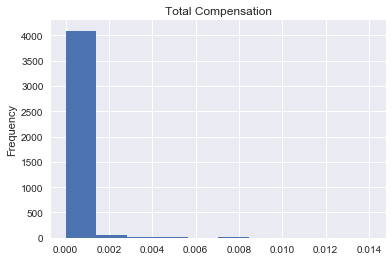

In [8]:
(comp_vals/df.shape[0]).plot(kind="hist");
plt.title("Total Compensation");

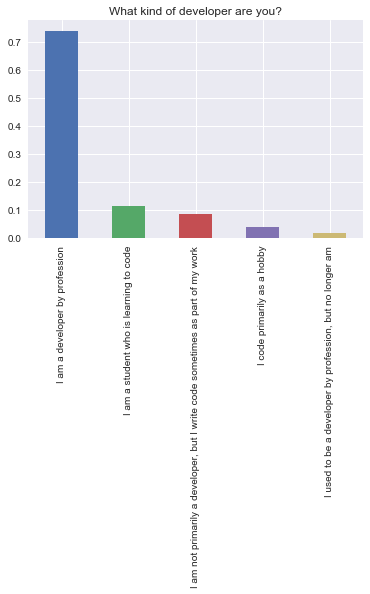

In [9]:
status_vals = df.MainBranch.value_counts()

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

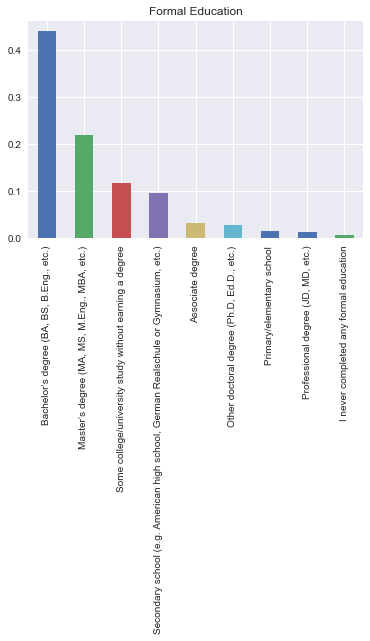

In [10]:
ed_vals = df.EdLevel.value_counts()

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

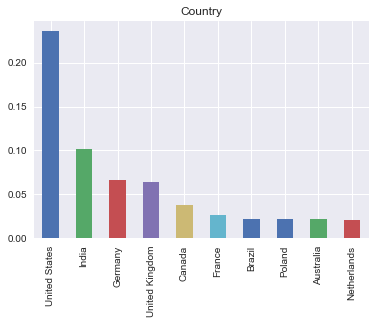

In [11]:
country_vals = df.Country.value_counts()

(country_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

## We see that below bar chart has comma separated environments


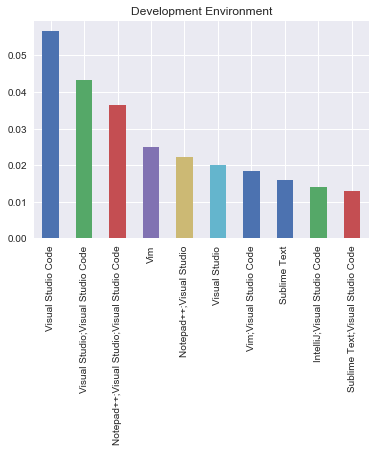

In [12]:
dev_environ_vals = df.DevEnviron.value_counts()

(dev_environ_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Development Environment");

### Lets try to group things with each environment 

In [13]:
all_dev_environ = df.DevEnviron.dropna().tolist()

In [14]:
all_dev_environ[-2:]

['Atom;Visual Studio;Visual Studio Code',
 'Android Studio;Atom;Eclipse;NetBeans;Notepad++;Sublime Text']

In [15]:
dev_environs = []
for env in all_dev_environ:
    envs = env.split(";")
    for e in envs:
        dev_environs.append(e)


### We see below bar chart with the cleaned up data


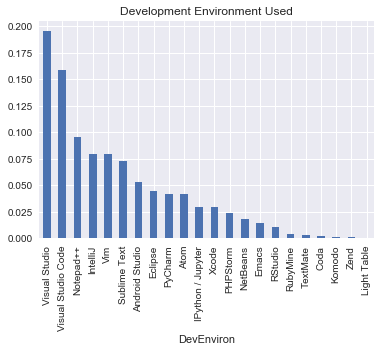

In [16]:
from collections import defaultdict
possible_vals = list(set(dev_environs))

def total_count(df, col1, col2, look_for):
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

def clean_and_plot(df, title="Development Environment Used", 
                   col_name='DevEnviron', possible_vals=possible_vals, 
                   plot=True):
    value_counts = df[col_name].value_counts().reset_index()
    value_counts.rename(columns={'index': col_name, col_name:'count'}, inplace=True)
    values_df = total_count(value_counts, col_name, "count", possible_vals)
    
    values_df.set_index(col_name, inplace=True)
    if plot:
        (values_df/values_df.sum()).plot(kind='bar', legend=None)
        plt.title(title)
        plt.show()
    props_values_df = values_df/values_df.sum()
    return props_values_df


props_df = clean_and_plot(df)


### 19.5% people uses Visual Studio, 15.8% use visual studio code.  Other environment has less than 10% usage

In [17]:
props_df

,count
DevEnviron,
Visual Studio,0.195360
Visual Studio Code,0.158432
Notepad++,0.095182
IntelliJ,0.079254
Vim,0.079243
Sublime Text,0.073025
Android Studio,0.052870
Eclipse,0.045019
PyCharm,0.041919


### Lets see if people with higher education tend to use the same two highest used environment

In [18]:
ed_vals

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

In [19]:
higher_ed = ["Master’s degree", "Other doctoral degree", "Professional degree"]
def higher_ed(formal_ed_str, higher_ed=higher_ed):
    for ed in higher_ed:
        if ed in formal_ed_str:
            return 1
    return 0
    
df["EdLevel"].dropna().apply(higher_ed)[-210:-200]


88574    1
88575    0
88577    0
88579    0
88580    0
88581    1
88582    0
88584    0
88585    0
88587    0
Name: EdLevel, dtype: int64

In [20]:
df['HigherEd'] = df["EdLevel"].dropna().apply(higher_ed)
higher_ed_perc = df["HigherEd"].mean()


In [21]:
higher_ed_perc

0.2685380252344021

In [22]:
ed_1 = df[df['HigherEd'] == 1]
ed_0 = df[df['HigherEd'] == 0]

print(ed_1['HigherEd'][:5])
print(ed_0['HigherEd'][:5])

9     1.0
12    1.0
13    1.0
15    1.0
17    1.0
Name: HigherEd, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HigherEd, dtype: float64


### We see below that people with higher education tend to  use the top two development environment less (almost 2.6% less).  IPython/Jupyter has the highest positive more usage amongst people with higher education (2.1% higher)

In [23]:
ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max od Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
DevEnviron,,,
Visual Studio,0.17643,0.202574,-0.0261442
Visual Studio Code,0.139724,0.165753,-0.0260284
Notepad++,0.0997893,0.0929701,0.00681917
Vim,0.086399,0.0776159,0.00878315
IntelliJ,0.0838485,0.0781357,0.00571282
Sublime Text,0.0677414,0.0749169,-0.00717551
Eclipse,0.0508442,0.0424991,0.00834511
PyCharm,0.0469352,0.0402699,0.00666531
IPython / Jupyter,0.0458956,0.0242109,0.0216847


In [24]:
sol = {
    'Everyone should use Open Source development environment': False,
    'Regardless of formal education, Visual Studio is top used development environment': True,
    'There is less than a 1% difference between open source or closed source environment usage for all forms of education': False,
    'Those with higher formal education use Visual Studio more than those who do not have it': False
}

In [25]:
sol

{'Everyone should use Open Source development environment': False,
 'Regardless of formal education, Visual Studio is top used development environment': True,
 'There is less than a 1% difference between open source or closed source environment usage for all forms of education': False,
 'Those with higher formal education use Visual Studio more than those who do not have it': False}

In [26]:
set(comp_df.index.tolist())

{'Android Studio',
 'Atom',
 'Coda',
 'Eclipse',
 'Emacs',
 'IPython / Jupyter',
 'IntelliJ',
 'Komodo',
 'Light Table',
 'NetBeans',
 'Notepad++',
 'PHPStorm',
 'PyCharm',
 'RStudio',
 'RubyMine',
 'Sublime Text',
 'TextMate',
 'Vim',
 'Visual Studio',
 'Visual Studio Code',
 'Xcode',
 'Zend'}

## Lets see top closed source development environment based on weather people use any open source envrionment or not

In [27]:
open_source = {'Android Studio': False,
 'Atom': True,
 'Coda': False,
 'Eclipse': True,
 'Emacs': True,
 'IPython / Jupyter': True,
 'IntelliJ': False,
 'Komodo': True,
 'Light Table': True,
 'NetBeans': True,
 'Notepad++': False,
 'PHPStorm': False,
 'PyCharm': False,
 'RStudio': True,
 'RubyMine': False,
 'Sublime Text': False,
 'TextMate': True,
 'Vim': True,
 'Visual Studio': False,
 'Visual Studio Code': True,
 'Xcode': False,
 'Zend': True}

In [28]:
open_source['Atom']

True

In [29]:
# def clean_and_plot(df, title="Development Environment Used", 
#                    col_name='DevEnviron', possible_vals=possible_vals, 
#                    plot=True):
    
# ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=True)
# ed_0_perc = clean_and_plot(ed_0, 'Max od Bachelors Higher Ed', plot=True)


In [30]:
open_source = {'Atom','Eclipse','Emacs','IPython / Jupyter', 
               'Komodo','Light Table','NetBeans', 'RStudio',
               'TextMate','Vim','Visual Studio Code','Zend'}

def open_source(dev_env_str, open_source=open_source):
    for ed in open_source:
        if ed in dev_env_str:
            return 1
    return 0


df['OpenSource'] = df["DevEnviron"].dropna().apply(open_source)
open_source_perc = df["OpenSource"].mean()

open_source_1 = df[df['OpenSource'] == 1]
open_source_0 = df[df['OpenSource'] == 0]

print(open_source_1['OpenSource'][:5])
print(open_source_0['OpenSource'][:5])

open_source_1_perc = clean_and_plot(open_source_1, 'Open Source', plot=False)
open_source_0_perc = clean_and_plot(open_source_0, 'Closed Source/Commercial', plot=False)






1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: OpenSource, dtype: float64
0     0.0
6     0.0
13    0.0
30    0.0
33    0.0
Name: OpenSource, dtype: float64


### People who also use any open source environment, use Visual Studio and Noepad++, SublimeText and IntelliJ as top development environment.  Weather they use open source environment or not, usage of Visual Studio does not change significantly.
### Usage for Notepad++, IntelliJ, and Sublime Text is significantly high for people who dont use any open source at all.  

In [31]:
comp_df = pd.merge(open_source_1_perc, open_source_0_perc, left_index=True, right_index=True)
comp_df.columns = ['open_source_1_perc', 'open_source_0_perc']
comp_df['Diff_OpenSource_Vals'] = comp_df['open_source_1_perc'] - comp_df['open_source_0_perc']
comp_df.style.bar(subset=['Diff_OpenSource_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


,open_source_1_perc,open_source_0_perc,Diff_OpenSource_Vals
DevEnviron,,,
Visual Studio,0.194829,0.199799,-0.00497045
Notepad++,0.084238,0.18668,-0.102442
IntelliJ,0.0704152,0.153146,-0.0827307
Sublime Text,0.062517,0.160877,-0.0983598
Android Studio,0.0469968,0.101975,-0.0549777
PyCharm,0.0389585,0.0666667,-0.0277081
Xcode,0.0259523,0.0587684,-0.0328161
PHPStorm,0.0192351,0.0615797,-0.0423446
RubyMine,0.00389505,0.00766399,-0.00376894


In [32]:
sol = {
    'Everyone should use one development environment': False,
    
    'Regardless of weather open source or closed source is used, Visual Studio is top used closed source development environment': True,
    
    'People using NotePad++ or Sublime Text are the ones using mostly losed source environment': True,
    
    'For most used environment, there is less than .05% difference between those who use most of open source and  those who do not use mostly open source  ': True
}

In [33]:
open_source_1_perc

,count
DevEnviron,
Visual Studio,0.194829
Visual Studio Code,0.177383
Vim,0.088722
Notepad++,0.084238
IntelliJ,0.070415
Sublime Text,0.062517
Eclipse,0.050404
Android Studio,0.046997
Atom,0.046581


In [34]:
open_source_0_perc

,count
DevEnviron,
Visual Studio,0.199799
Notepad++,0.186680
Sublime Text,0.160877
IntelliJ,0.153146
Android Studio,0.101975
PyCharm,0.066667
PHPStorm,0.061580
Xcode,0.058768
RubyMine,0.007664


In [35]:
# df["DevEnviron"]

## Lets see what is top open source environment used by people based on weather they use any non open source development environment or not

In [36]:
closed_source = {'Android Studio',
 'Coda',
 'IntelliJ',
 'Notepad++',
 'PHPStorm',
 'PyCharm',
 'RubyMine',
 'Sublime Text',
 'Visual Studio',
 'Xcode'}

def closed_source(dev_env_str, closed_source=closed_source):
    for ed in closed_source:
        if ed in dev_env_str:
            return 1
    return 0


df['closedSource'] = df["DevEnviron"].dropna().apply(closed_source)
closed_source_perc = df["closedSource"].mean()

closed_source_1 = df[df['closedSource'] == 1]
closed_source_0 = df[df['closedSource'] == 0]

print(closed_source_1['closedSource'][:5])
print(closed_source_0['closedSource'][:5])

closed_source_1_perc = clean_and_plot(closed_source_1, 'closed Source', plot=False)
closed_source_0_perc = clean_and_plot(closed_source_0, 'Closed Source/Commercial', plot=False)



0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: closedSource, dtype: float64
8     0.0
20    0.0
31    0.0
32    0.0
67    0.0
Name: closedSource, dtype: float64


### We see that amongst people using any closed source development environment, Vim, Eclipse, Atom, and IPython/Jupyter are the highest used open source development environment.   
### Usage is significantly high for those development environments amongst people who use only open source environment, with Vim having 30% more usage and Atom having 13% more usage

In [37]:
comp_df = pd.merge(closed_source_1_perc, closed_source_0_perc, left_index=True, right_index=True)
comp_df.columns = ['closed_source_1_perc', 'closed_source_0_perc']
comp_df['Diff_closedSource_Vals'] = comp_df['closed_source_1_perc'] - comp_df['closed_source_0_perc']
comp_df.style.bar(subset=['Diff_closedSource_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


,closed_source_1_perc,closed_source_0_perc,Diff_closedSource_Vals
DevEnviron,,,
Vim,0.068417,0.376629,-0.308212
Eclipse,0.0428593,0.104336,-0.0614771
Atom,0.0368673,0.171722,-0.134855
IPython / Jupyter,0.0274216,0.0933428,-0.0659212
NetBeans,0.0178611,0.0306393,-0.0127781
RStudio,0.00889721,0.0548656,-0.0459684
Emacs,0.00884162,0.156352,-0.14751
TextMate,0.00275328,0.00631107,-0.0035578
Komodo,0.0012525,0.00305375,-0.00180124


In [38]:
sol = {
    'Everyone should use one development environment': False,
    
    'Regardless of weather open source or closed source is used, Vim is top used open source development environment': True,
    
    'People using the top open source development environment are the top people using open source overall': True,
    
    'For most used environment, there is huge difference between those who use most of open source and those who do not use mostly open source  ': True
}